In [1]:
import os
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import spectrogram, find_peaks
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

In [2]:
############################# uFunction for harmonics
def find_harmonics(path, print_peaks=False):
    #fs, K = wavfile.read(path)
    
    import librosa

    # Replace wavfile.read with librosa.load
    K, fs = librosa.load(path, sr=None)
    

    N = len(K)
    K_F = fft(K)
    K_F_onesided = 2.0/N * np.abs(K_F[0:N//2])
    
    #print(K_F_onesided.shape)
    #K_F_onesided = np.squeeze(K_F_onesided)

    
    freqs = fftfreq(N, 1/fs)[:N//2]
    freqs_50_index = np.abs(freqs - 50).argmin()
    
    h = K_F_onesided.max()*5/100
    peaks, _ = find_peaks(K_F_onesided, distance=10, height = h)
    peaks = peaks[peaks>freqs_50_index]
    harmonics = np.round(freqs[peaks],2)
    
    if print_peaks:
        i = peaks.max() + 100
        plt.plot(freqs[:i], K_F_onesided[:i])
        plt.plot(freqs[peaks], K_F_onesided[peaks], "x")
        plt.xlabel('Frequency [Hz]')
        plt.show()
    return harmonics

In [3]:
path = "C:/Users/saioc/Desktop/Facultate Part 2/TCRI - Tehnici de cautare si regasire a informatiei/Proiect TCRI/Audio_Files"

data = []
max_harm_length = 0 # for track of max harmonic length to name columns

for dirn, _, files in os.walk(path):
    for file in files:
        folder = os.path.basename(dirn)
        full_path = os.path.join(dirn, file)
        freq_peaks = find_harmonics(full_path)
        
        max_harm_length = max(max_harm_length, len(freq_peaks))
        
        cur_data = [folder, file]
        cur_data.extend([freq_peaks.min(), freq_peaks.max(), len(freq_peaks)])
        cur_data.extend(freq_peaks)
        
        data.append(cur_data)

In [4]:
# Column Names for DataFrame:
cols = ["Chord Type", "File Name", "Min Harmonic", "Max Harmonic", "# of Harmonics"]
for i in range(max_harm_length):
    cols.append("Harmonic {}".format(i+1))

# Creating DataFrame
df = pd.DataFrame(data, columns=cols)
df.head()

,Chord Type,File Name,Min Harmonic,Max Harmonic,# of Harmonics,Harmonic 1,Harmonic 2,Harmonic 3,Harmonic 4,Harmonic 5,...,Harmonic 29,Harmonic 30,Harmonic 31,Harmonic 32,Harmonic 33,Harmonic 34,Harmonic 35,Harmonic 36,Harmonic 37,Harmonic 38
0,Major,Major_0.wav,130.67,1838.22,21,130.67,165.33,196.00,262.22,330.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Major,Major_1.wav,131.11,993.33,16,131.11,165.33,174.67,196.44,261.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Major,Major_10.wav,130.91,1408.64,20,130.91,185.00,234.09,262.27,329.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Major,Major_100.wav,155.45,2449.09,27,155.45,195.91,278.18,311.36,349.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Major,Major_101.wav,155.91,1093.64,20,155.91,175.45,196.82,273.18,278.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df["Chord Type"].value_counts()

Chord Type
Major    502
Minor    357
Name: count, dtype: int64

In [6]:
df_original = df.copy()

In [7]:
df["# of Harmonics"].describe()

count    859.000000
mean      20.389988
std        6.656608
min        8.000000
25%       15.000000
50%       20.000000
75%       25.000000
max       38.000000
Name: # of Harmonics, dtype: float64

In [8]:
print("Number of Missing values:")
miss_values = df.isnull().sum().sort_values(ascending=False)
miss_values[miss_values>0]

Number of Missing values:


Harmonic 38    858
Harmonic 37    857
Harmonic 36    855
Harmonic 35    847
Harmonic 34    839
Harmonic 33    829
Harmonic 32    813
Harmonic 31    793
Harmonic 30    773
Harmonic 29    754
Harmonic 28    720
Harmonic 27    682
Harmonic 26    656
Harmonic 25    611
Harmonic 24    551
Harmonic 23    501
Harmonic 22    471
Harmonic 21    438
Harmonic 20    406
Harmonic 19    382
Harmonic 18    345
Harmonic 17    306
Harmonic 16    241
Harmonic 15    191
Harmonic 14    150
Harmonic 13    108
Harmonic 12     74
Harmonic 11     46
Harmonic 10     20
Harmonic 9      10
dtype: int64

In [9]:
df = df_original.copy() # refreshing df

for i in range(1,21):
    curr_interval = "Interval {}".format(i)
    curr_harm = "Harmonic {}".format(i+1)
    prev_harm = "Harmonic {}".format(i)
    df[curr_interval] = df[curr_harm].div(df[prev_harm], axis=0)
    
df.head()

,Chord Type,File Name,Min Harmonic,Max Harmonic,# of Harmonics,Harmonic 1,Harmonic 2,Harmonic 3,Harmonic 4,Harmonic 5,...,Interval 11,Interval 12,Interval 13,Interval 14,Interval 15,Interval 16,Interval 17,Interval 18,Interval 19,Interval 20
0,Major,Major_0.wav,130.67,1838.22,21,130.67,165.33,196.00,262.22,330.22,...,1.049688,1.197417,1.061102,1.103298,1.017656,1.113492,1.005082,1.043128,1.145029,1.166709
1,Major,Major_1.wav,131.11,993.33,16,131.11,165.33,174.67,196.44,261.78,...,1.125534,1.111533,1.008802,1.389790,1.080752,NaN,NaN,NaN,NaN,NaN
2,Major,Major_10.wav,130.91,1408.64,20,130.91,185.00,234.09,262.27,329.55,...,1.054971,1.063154,1.176470,1.011280,1.055261,1.124936,1.053495,1.124803,1.067888,NaN
3,Major,Major_100.wav,155.45,2449.09,27,155.45,195.91,278.18,311.36,349.55,...,1.113791,1.007590,1.064304,1.119760,1.122995,1.039390,1.019581,1.059233,1.059000,1.102333
4,Major,Major_101.wav,155.91,1093.64,20,155.91,175.45,196.82,273.18,278.18,...,1.188654,1.191808,1.060464,1.057780,1.251999,1.069225,1.120785,1.124279,1.038861,NaN


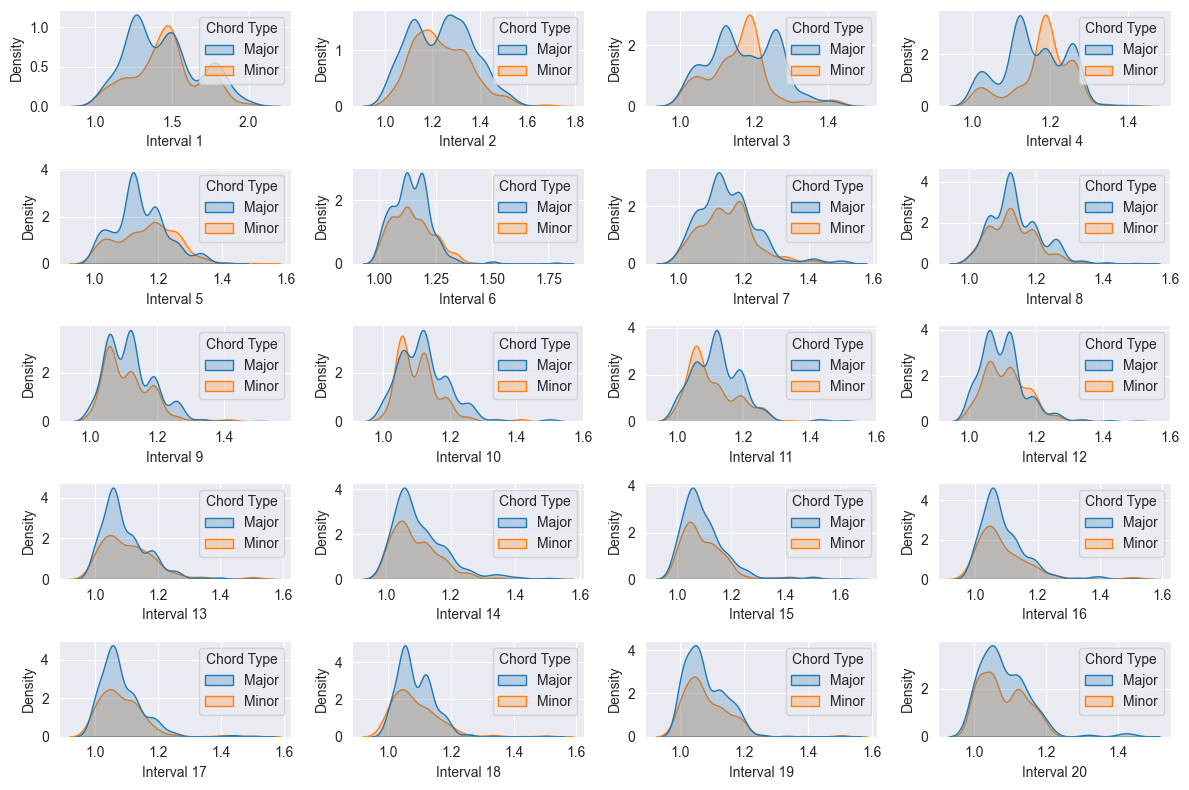

In [10]:
# Lets plot them
fig, axes = plt.subplots(5, 4, figsize=(12, 8))
for i in range(1,21):
    plt.subplot(5, 4, i)
    sns.kdeplot(data=df, x="Interval {}".format(i), hue="Chord Type", fill=True)
fig.tight_layout()
plt.show()

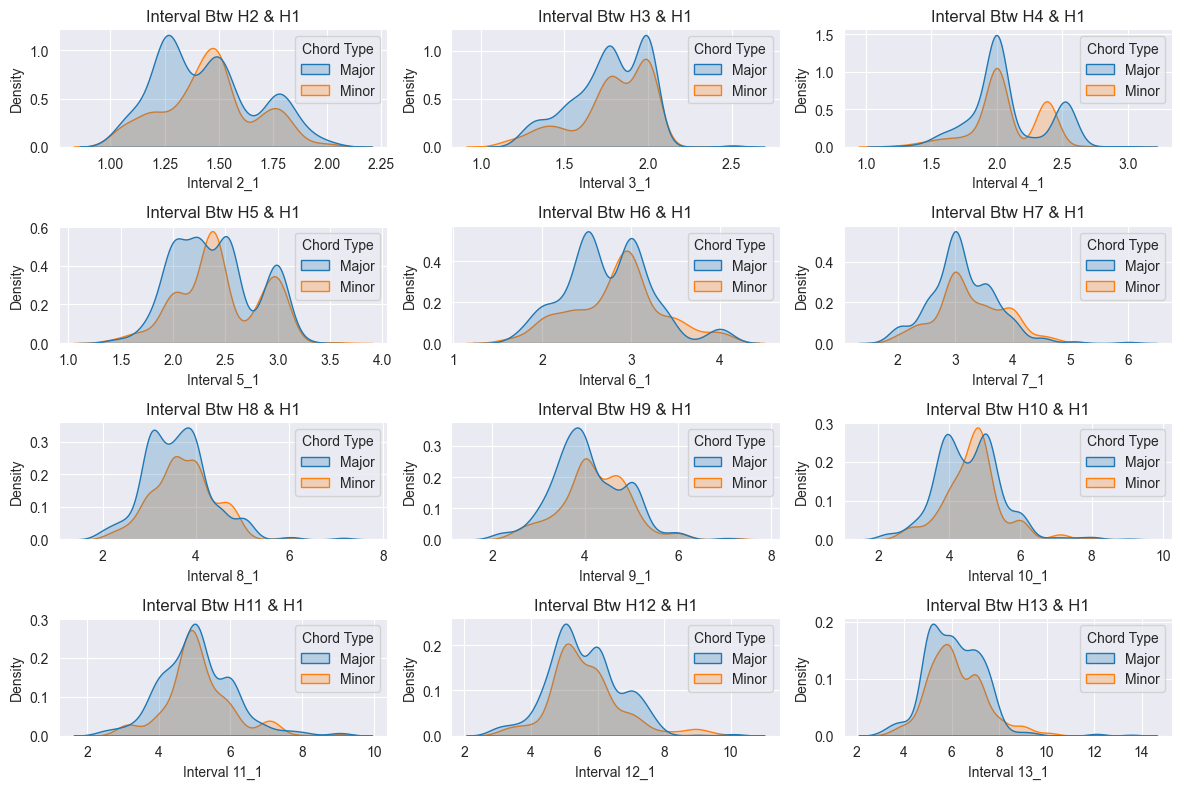

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(12, 8))
for i in range(2,14):
    curr_interval = "Interval {}_1".format(i)
    curr_harm = "Harmonic {}".format(i)
    df[curr_interval] = df[curr_harm].div(df["Harmonic 1"], axis=0)
    
    plt.subplot(4, 3, i-1)
    plt.gca().set_title("Interval Btw H{} & H1".format(i))
    sns.kdeplot(data=df, x=curr_interval, hue="Chord Type", fill=True)
fig.tight_layout()
plt.show()

In [12]:
df["Chord Type"] = df["Chord Type"].replace("Major", 1)
df["Chord Type"] = df["Chord Type"].replace("Minor", 0)

df.head()

,Chord Type,File Name,Min Harmonic,Max Harmonic,# of Harmonics,Harmonic 1,Harmonic 2,Harmonic 3,Harmonic 4,Harmonic 5,...,Interval 4_1,Interval 5_1,Interval 6_1,Interval 7_1,Interval 8_1,Interval 9_1,Interval 10_1,Interval 11_1,Interval 12_1,Interval 13_1
0,1,Major_0.wav,130.67,1838.22,21,130.67,165.33,196.00,262.22,330.22,...,2.006735,2.527129,2.999923,3.792454,4.016913,4.503252,5.044081,6.023647,6.322951,7.571210
1,1,Major_1.wav,131.11,993.33,16,131.11,165.33,174.67,196.44,261.78,...,1.498284,1.996644,2.033941,2.525437,2.593242,2.993212,3.783083,3.996644,4.498360,5.000076
2,1,Major_10.wav,130.91,1408.64,20,130.91,185.00,234.09,262.27,329.55,...,2.003437,2.517378,2.829807,3.003437,3.576350,4.242991,5.034680,5.368039,5.663127,6.020778
3,1,Major_100.wav,155.45,2449.09,27,155.45,195.91,278.18,311.36,349.55,...,2.002959,2.248633,2.523448,3.003023,3.579029,3.783725,4.005983,4.497202,5.008942,5.046960
4,1,Major_101.wav,155.91,1093.64,20,155.91,175.45,196.82,273.18,278.18,...,1.752165,1.784234,1.816304,1.997050,2.029119,2.192419,2.247771,2.518953,2.994163,3.568469


In [13]:
# importing packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
columns = ["Interval 1", "Interval 2", "Interval 3", "Interval 4", "Interval 5"]
columns.extend(["Interval 2_1","Interval 4_1", "Interval 5_1", "Interval 6_1"])
train_X, val_X, train_y, val_y = train_test_split(df[columns], df["Chord Type"], test_size=0.30, random_state=42)
train_X.head()

,Interval 1,Interval 2,Interval 3,Interval 4,Interval 5,Interval 2_1,Interval 4_1,Interval 5_1,Interval 6_1
28,1.413212,1.261215,1.125200,1.259617,1.118852,1.413212,2.005515,2.526182,2.826424
457,1.501498,1.121660,1.187528,1.261579,1.188959,1.501498,2.000000,2.523158,2.999932
193,1.506012,1.330672,1.123227,1.125895,1.186902,1.506012,2.250956,2.534341,3.008016
367,1.788230,1.063333,1.051867,1.263506,1.189081,1.788230,2.000108,2.527149,3.004985
467,1.594401,1.120381,1.119610,1.261579,1.188959,1.594401,2.000000,2.523158,2.999932


In [15]:
print("The shape of X_train is      ", train_X.shape)
print("The shape of X_test is       ", val_X.shape)
print("The shape of y_train is      ", train_y.shape)
print("The shape of y_test is       ", val_y.shape)

The shape of X_train is       (601, 9)
The shape of X_test is        (258, 9)
The shape of y_train is       (601,)
The shape of y_test is        (258,)


In [16]:
# Assuming train_X is a pandas DataFrame
missing_data = train_X.isnull().sum()

# Display the count of missing values for each column
print("Missing Data Counts:")
print(missing_data)

# Display the columns with missing values
columns_with_missing_data = missing_data[missing_data > 0].index
print("\nColumns with Missing Data:")
print(columns_with_missing_data)

Missing Data Counts:
Interval 1      0
Interval 2      0
Interval 3      0
Interval 4      0
Interval 5      0
Interval 2_1    0
Interval 4_1    0
Interval 5_1    0
Interval 6_1    0
dtype: int64

Columns with Missing Data:
Index([], dtype='object')


In [17]:
lr = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
svc = SVC(random_state=0)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)


score_lr = cross_val_score(lr, train_X, train_y, cv=10).mean()
score_knn = cross_val_score(knn, train_X, train_y, cv=10).mean()
score_svc = cross_val_score(svc, train_X, train_y, cv=10).mean()
score_gnb = cross_val_score(gnb, train_X, train_y, cv=10).mean()
score_dtc = cross_val_score(dtc, train_X, train_y, cv=10).mean()
score_rfc = cross_val_score(rfc, train_X, train_y, cv=10).mean()
score_gbc = cross_val_score(gbc, train_X, train_y, cv=10).mean()


print("Cross Val Score for Logistic Regression: {:.2f}".format(score_lr))
print("Cross Val Score for KNeighbors Classifier: {:.2f}".format(score_knn))
print("Cross Val Score for SVC: {:.2f}".format(score_svc))
print("Cross Val Score for Gaussian NB: {:.2f}".format(score_gnb))
print("Cross Val Score for Decision Tree Classifier: {:.2f}".format(score_dtc))
print("Cross Val Score for Random Forest Classifier: {:.2f}".format(score_rfc))
print("Cross Val Score for Gradient Boosting Classifier: {:.2f}".format(score_gbc))

Cross Val Score for Logistic Regression: 0.57
Cross Val Score for KNeighbors Classifier: 0.83
Cross Val Score for SVC: 0.59
Cross Val Score for Gaussian NB: 0.64
Cross Val Score for Decision Tree Classifier: 0.90
Cross Val Score for Random Forest Classifier: 0.93
Cross Val Score for Gradient Boosting Classifier: 0.93


In [18]:
classifier1 = RandomForestClassifier(random_state=0)

classifier1.fit(train_X, train_y) 
pred_y1 = classifier1.predict(val_X)

In [19]:
cm1 = confusion_matrix(val_y, pred_y1)
acc1 = accuracy_score(val_y, pred_y1)

print("Confusion Matrix of Random Forest:")
print(cm1)
print("Accuracy Score of Random Forest: {:.2f}".format(acc1))

Confusion Matrix of Random Forest:
[[ 93  13]
 [ 10 142]]
Accuracy Score of Random Forest: 0.91


In [20]:
classifier2 = DecisionTreeClassifier(random_state=0)

classifier2.fit(train_X, train_y) 
pred_y2 = classifier2.predict(val_X)

In [21]:
cm2 = confusion_matrix(val_y, pred_y2)
acc2 = accuracy_score(val_y, pred_y2)

print("Confusion Matrix of Decision Tree:")
print(cm2)
print("Accuracy Score of Decision Tree: {:.2f}".format(acc2))

Confusion Matrix of Decision Tree:
[[ 93  13]
 [ 11 141]]
Accuracy Score of Decision Tree: 0.91


In [22]:
classifier3 = GradientBoostingClassifier(random_state=0)

classifier3.fit(train_X, train_y) 
pred_y3 = classifier3.predict(val_X)

In [23]:
cm3 = confusion_matrix(val_y, pred_y3)
acc3 = accuracy_score(val_y, pred_y3)

print("Confusion Matrix of Gradient Boosting Classifier:")
print(cm3)
print("Accuracy Score of Gradient Boosting Classifier: {:.2f}".format(acc3))

Confusion Matrix of Gradient Boosting Classifier:
[[ 93  13]
 [  6 146]]
Accuracy Score of Gradient Boosting Classifier: 0.93


In [24]:
classifier4 = KNeighborsClassifier()

classifier4.fit(train_X, train_y) 
pred_y4 = classifier4.predict(val_X)

In [25]:
cm4 = confusion_matrix(val_y, pred_y4)
acc4 = accuracy_score(val_y, pred_y4)

print("Confusion Matrix of KNeighbors Classifier:")
print(cm4)
print("Accuracy Score of KNeighbors Classifier: {:.2f}".format(acc4))

Confusion Matrix of KNeighbors Classifier:
[[ 87  19]
 [ 24 128]]
Accuracy Score of KNeighbors Classifier: 0.83


In [36]:
single = train_X.iloc[2]
print(single)
single = np.array([1.50601202, 1.33067199, 1.12322727, 1.12589535, 1.18690245, 1.50601202, 2.25095646, 2.53434141, 3.00801603])

# Reshape the array to a 2D array
single_reshaped = single.reshape(-1, 1)

# Now you can use classifier4.predict with the reshaped array
pred_single = classifier2.predict(np.transpose(single_reshaped))
print(pred_single)


Interval 1      1.506012
Interval 2      1.330672
Interval 3      1.123227
Interval 4      1.125895
Interval 5      1.186902
Interval 2_1    1.506012
Interval 4_1    2.250956
Interval 5_1    2.534341
Interval 6_1    3.008016
Name: 193, dtype: float64
[1]


C:\Users\saioc\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [34]:
print(single_reshaped)

SyntaxError: invalid syntax (3907131268.py, line 1)